In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
df=pd.read_excel('Revenue_clean.xlsx')

In [10]:
df.describe()

,Year,Operating Income,System Passenger Yield,Total Revenue,Net Income,Baggage&cancellation fee
count,357.000000,357.000000,357.000000,357.000000,357.000000,3.570000e+02
mean,2010.000000,421.218045,12.352363,13853.396331,26.210605,8.795266e+05
std,6.063799,2663.902768,2.413758,14449.643924,2945.262975,1.268796e+06
min,2000.000000,-12469.000000,3.423014,0.000000,-21176.000000,2.896070e+03
25%,2005.000000,-30.464000,11.228276,982.555000,-64.886000,1.047087e+05
50%,2010.000000,86.318000,12.794746,8969.000000,7.545000,2.757580e+05
75%,2015.000000,1022.000000,14.174479,22150.000000,571.000000,1.143788e+06
max,2020.000000,7802.000000,18.525660,47007.000000,22876.000000,5.494626e+06


In [5]:
df.head(15)

,Airline Company,Year,Operating Income,System Passenger Yield,Total Revenue,Net Income,Baggage&cancellation fee
0,American,2000,1381.0,14.040786,19703.0,813.0,161555.0
1,American,2001,-2470.0,13.243449,18969.0,-1762.0,118689.0
2,American,2002,-3330.0,11.839526,17420.0,-3511.0,108872.0
3,American,2003,-844.0,11.829865,17440.0,-1228.0,154157.0
4,American,2004,-134.0,11.510702,18645.0,-751.0,161829.0
5,American,2005,-89.0,11.975869,20712.0,-857.0,171500.0
6,American,2006,1060.0,12.794746,22563.0,231.0,210568.0
7,American,2007,965.0,13.064305,22935.0,504.0,204186.0
8,American,2008,-1889.0,13.828277,23766.0,-2071.0,826328.0
9,American,2009,-1163.0,12.268089,19898.0,1474.0,1002403.0


In [5]:
new_names={'Airline Company':'Airline',
              'Year':'Year',
              'Operating Income':'Oper_income',
              'System Passenger Yield ':'SPY',
              'Total Revenue ':'Tot_revenue',
              'Net Income':'Net_income',
           'Baggage&cancellation fee':'Baggage&cancellation fee'}
df.rename(columns=new_names, inplace=True)

In [23]:
df.head()

,Airline,Year,Oper_income,SPY,Tot_revenue,Net_income,Baggage&cancellation fee
0,American,2000,1381.0,14.040786,19703.0,813.0,161555.0
1,American,2001,-2470.0,13.243449,18969.0,-1762.0,118689.0
2,American,2002,-3330.0,11.839526,17420.0,-3511.0,108872.0
3,American,2003,-844.0,11.829865,17440.0,-1228.0,154157.0
4,American,2004,-134.0,11.510702,18645.0,-751.0,161829.0


## Descriptive Analysis for 'Net_income' and 'Oper_income'

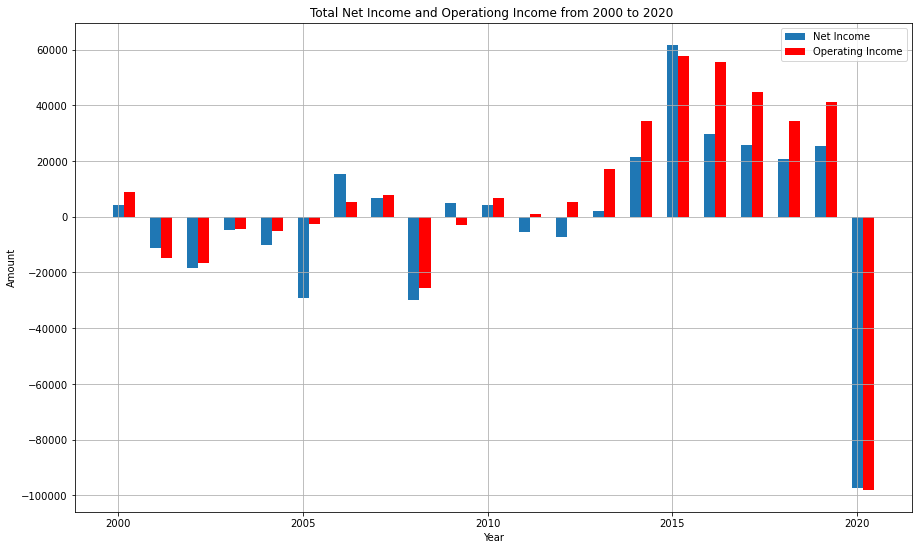

In [6]:
year=np.array(range(2000,2021))
spy=df.groupby('Year')['Net_income'].sum()
oper_income=df.groupby('Year')['Oper_income'].sum()
plt.figure(figsize = (15,9))
b1 = plt.bar(year, spy, width=0.3,
                label="Net Income", align="center")

b2 = plt.bar(year+0.3,oper_income, color="red", width=0.3,
                label="Operating Income", align="center")

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Total Net Income and Operationg Income from 2000 to 2020 ')
plt.grid()
plt.legend()
plt.show()

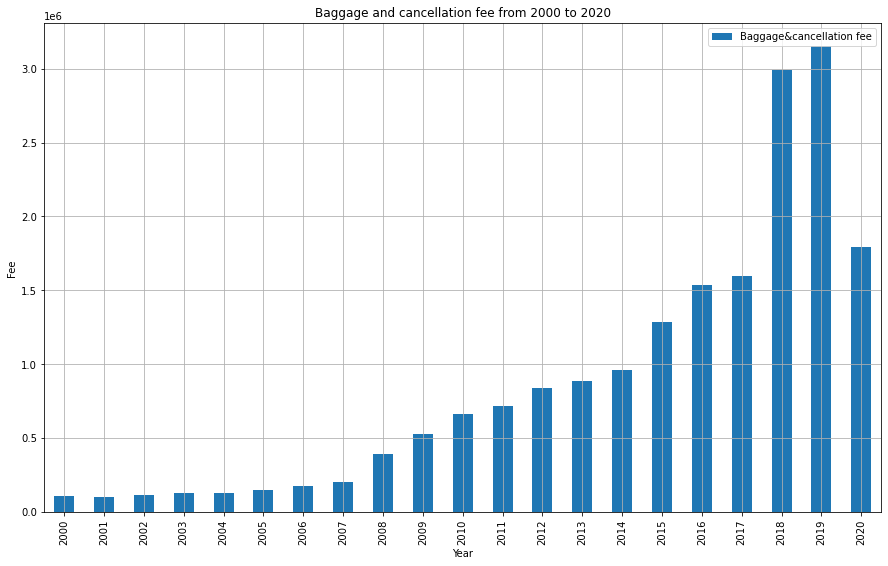

In [6]:
plt.figure(figsize = (15,9))
df.groupby('Year')['Baggage&cancellation fee'].mean().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Fee')
plt.title('Baggage and cancellation fee from 2000 to 2020')
plt.grid()
plt.legend()
plt.show()

In [6]:
X = df[['Baggage&cancellation fee']]
y = df[['Tot_revenue']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(f'R2 score is {r2_score(y_pred,y_test)}')
print(f'Co-efficients are {lr.coef_}')
print(f'Intercept is {lr.intercept_}')

R2 score is 0.3411829195741932
Co-efficients are [[0.00888108]]
Intercept is [6164.56124291]


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Whole trend of linear relationship between Baggage&cancellation fee and Revenue')

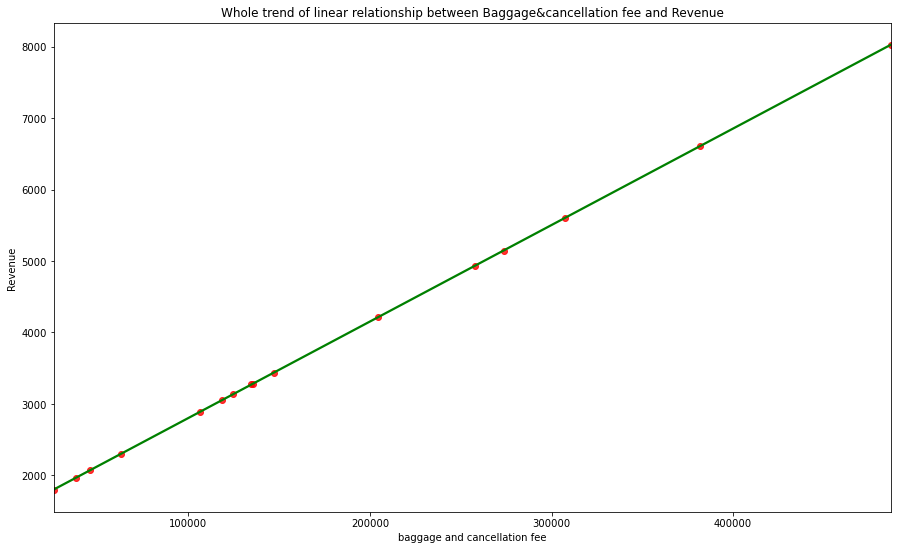

In [80]:
plt.figure(figsize = (15,9))
sns.regplot(X_test,y_pred, scatter_kws={"color": "red"}, line_kws={"color": "green"})
plt.xlabel('baggage and cancellation fee')
plt.ylabel('Revenue')
plt.title('Whole trend of linear relationship between Baggage&cancellation fee and Revenue')

## Compare linear models in different category of companies

In [32]:
df['Airline'].unique()

array(['American', 'Continental', 'Delta', 'Northwest', 'UAL',
       'US Airways', 'America West', 'Midwest Air Group Inc',
       'Southwest Airlines Co', 'AirTran Holdings Inc',
       'JetBlue Airways Corp', 'Alaska Air Group Inc', 'Virgin America',
       'Hawaiian Holdings Inc', 'Allegiant',
       'Frontier Airlines Holdings Inc', 'Spirit Airlines, Inc.'],
      dtype=object)

In [7]:
## split company into Network, LLC and other
network=df[df['Airline'].isin(['American','Continental', 'Delta', 'Northwest', 'UAL','US Airways', 'America West'])]

LCC=df[df['Airline'].isin(['Southwest Airlines Co','AirTran Holdings Inc','JetBlue Airways Corp'
                       ,'Frontier Airlines Holdings Inc','Virgin America'])]

other=df[df['Airline'].isin(['Alaska Air Group Inc','Hawaiian Holdings Inc', 'Allegiant'])]

In [8]:
network.describe()

,Year,Oper_income,SPY,Tot_revenue,Net_income,Baggage&cancellation fee
count,147.000000,147.000000,147.000000,147.000000,147.000000,1.470000e+02
mean,2010.000000,620.012966,13.265056,22783.536286,-66.301184,1.386443e+06
std,6.076003,3501.882464,1.526095,13709.239210,4191.903996,1.459252e+06
min,2000.000000,-12469.000000,9.395327,522.989000,-21176.000000,1.502316e+04
25%,2005.000000,-327.000000,12.107792,12548.000000,-1683.500000,2.310505e+05
50%,2010.000000,151.000000,13.381074,19898.000000,57.420000,9.768650e+05
75%,2015.000000,2656.000000,14.441106,38590.000000,1543.000000,2.064041e+06
max,2020.000000,7802.000000,16.102134,47007.000000,22876.000000,5.494626e+06


In [9]:
LCC.describe()

,Year,Oper_income,SPY,Tot_revenue,Net_income,Baggage&cancellation fee
count,105.000000,105.000000,105.000000,105.000000,105.000000,1.050000e+02
mean,2010.000000,376.261133,12.268057,8864.833429,133.531505,6.058149e+05
std,6.084343,2097.671773,2.633014,11796.082878,1745.611691,1.086117e+06
min,2000.000000,-10421.000000,3.423014,105.000000,-8885.000000,2.896070e+03
25%,2005.000000,0.592000,11.340085,664.501000,5.412000,7.160673e+04
50%,2010.000000,81.151000,12.607174,2842.000000,16.550000,1.729233e+05
75%,2015.000000,725.000000,14.040786,14518.000000,421.000000,5.081095e+05
max,2020.000000,6204.000000,18.525660,42650.000000,7610.000000,5.046180e+06


In [10]:
other.describe()

,Year,Oper_income,SPY,Tot_revenue,Net_income,Baggage&cancellation fee
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,2010.000000,63.013302,11.579464,3279.570159,-5.994984,144538.396349
std,6.103938,732.475864,2.317499,4450.244060,623.985878,136973.584354
min,2000.000000,-3330.000000,5.163312,0.000000,-3511.000000,10773.690000
25%,2005.000000,-10.534000,9.607795,664.501000,-16.149000,45245.930000
50%,2010.000000,0.592000,12.342139,2152.800000,5.412000,106312.700000
75%,2015.000000,290.884000,13.350113,3536.000000,153.823000,186954.115000
max,2020.000000,1381.000000,14.688373,19703.000000,1034.000000,619337.000000


R2 score is 0.3788310607312466
Co-efficients are [[9597.37754565]]
Intercept is [23574.39019091]
R2 score is -0.609203834102505
Co-efficients are [[10331.03391351]]
Intercept is [10050.32052564]
R2 score is -5.997865622431822
Co-efficients are [[1848.66153344]]
Intercept is [3248.99478723]


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


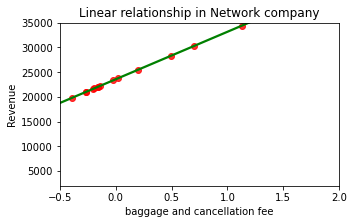

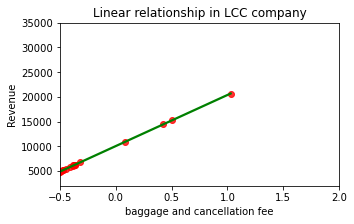

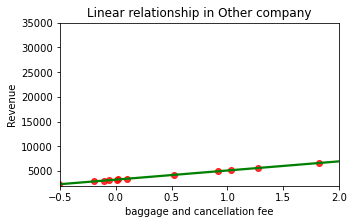

In [75]:
com=('Network','LCC','Other')
j=1
for i in (network,LCC,other):
    X = i[['Baggage&cancellation fee']]
    y = i[['Tot_revenue']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    s = StandardScaler()
    X_train_s = s.fit_transform(X_train)
    lr.fit(X_train_s, y_train)
    X_test_s = s.transform(X_test)
    y_pred = lr.predict(X_test_s)
    print(f'R2 score is {r2_score(y_pred,y_test)}')
    print(f'Co-efficients are {lr.coef_}')
    print(f'Intercept is {lr.intercept_}')
    
    plt.figure(figsize = (5,3))
    sns.regplot(X_test_s,y_pred, scatter_kws={"color": "red"}, line_kws={"color": "green"})
    plt.xlim(-0.5,2)
    plt.ylim(2000,35000)
    plt.xlabel('baggage and cancellation fee')
    plt.ylabel('Revenue')
    plt.title('Linear relationship in '+ str(com[j-1]) +' company')
    j+=1